# Mel Jensen

## Research question/interests

My main research question is are people that have higher Openness to Experirence also have higher Agreeableness. I will focus on looking at the scores of those two traits to see if they often have high correlation.

In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns

In [ ]:
file = ('../data/raw/data.csv')
df = pd.read_csv(file, sep='\t')

df

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## EDA

In [ ]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

## Defining which columns go with which trait
### E = Extroversion
### N = Neruoticism
### A = Agreeableness
### C = Conscientiousness
### O = Openness to Experience

The traits I am using for my analysis are A and O

## Which columns are positive vs negative attributes
A1 -<br/>
A2 +<br/>
A3 -<br/>
A4 +<br/>
A5 -<br/>
A6 +<br/>
A7 -<br/>
A8 +<br/>
A9 +<br/>
A10 +<br/>
O1 +<br/>
O2 -<br/>
O3 +<br/>
O4 -<br/>
O5 +<br/>
O6 -<br/>
O7 +<br/>
O8 +<br/>
O9 +<br/>
O10 +<br/>

In [ ]:
## From these I need to pull the columns I need and convert them to negative values if needed

NewA1=-(df['A1'])
NewA2=(df['A2'])
NewA3=-(df['A3'])
NewA4=(df['A4'])
NewA5=-(df['A5'])
NewA6=(df['A6'])
NewA7=-(df['A7'])
NewA8=(df['A8'])
NewA9=(df['A9'])
NewA10=(df['A10'])
NewO1=(df['O1'])
NewO2=-(df['O2'])
NewO3=(df['O3'])
NewO4=-(df['O4'])
NewO5=(df['O5'])
NewO6=-(df['O6'])
NewO7=(df['O7'])
NewO8=(df['O8'])
NewO9=(df['O9'])
NewO10=(df['O10'])

In [ ]:
## Create a dataframe with the values I need
frames=[NewA1, NewA2, NewA3, NewA4, NewA5, NewA6, NewA7, NewA8, NewA9, NewA10,
    NewO1, NewO2, NewO3, NewO4, NewO5, NewO6, NewO7, NewO8, NewO9, NewO10]
df2 = pd.concat(frames, axis=1)
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,-1,5,-1,5,-2,3,-1,5,4,5,4,-1,3,-1,5,-1,4,2,5,5
1,-1,3,-3,4,-4,4,-2,3,4,3,3,-3,3,-3,2,-3,3,1,3,2
2,-5,1,-5,5,-1,5,-1,5,5,5,4,-5,5,-1,5,-1,5,5,5,5
3,-2,5,-4,4,-3,5,-3,4,4,3,4,-3,5,-2,4,-2,5,2,5,5
4,-5,5,-3,5,-1,5,-1,5,5,5,3,-1,1,-1,3,-1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,-5,5,-1,5,-1,5,-1,1,5,5,1,-3,5,-3,4,-1,4,2,5,3
19715,-2,3,-2,4,-2,4,-2,3,3,3,1,-2,3,-2,3,-3,4,2,3,3
19716,-4,3,-5,2,-5,5,-2,4,1,3,5,-3,1,-3,4,-1,1,5,5,5
19717,-3,3,-2,4,-2,4,-2,5,4,3,3,-2,5,-3,4,-1,5,3,5,5


In [ ]:
## Dataframe with A values
Aframes=[NewA1, NewA2, NewA3, NewA4, NewA5, NewA6, NewA7, NewA8, NewA9, NewA10]
Aframe = pd.concat(Aframes, axis=1)
Aframe

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,-1,5,-1,5,-2,3,-1,5,4,5
1,-1,3,-3,4,-4,4,-2,3,4,3
2,-5,1,-5,5,-1,5,-1,5,5,5
3,-2,5,-4,4,-3,5,-3,4,4,3
4,-5,5,-3,5,-1,5,-1,5,5,5
...,...,...,...,...,...,...,...,...,...,...
19714,-5,5,-1,5,-1,5,-1,1,5,5
19715,-2,3,-2,4,-2,4,-2,3,3,3
19716,-4,3,-5,2,-5,5,-2,4,1,3
19717,-3,3,-2,4,-2,4,-2,5,4,3


In [ ]:
## Dataframe with O values
Oframes=[NewO1, NewO2, NewO3, NewO4, NewO5, NewO6, NewO7, NewO8, NewO9, NewO10]
Oframe = pd.concat(Oframes, axis=1)
Oframe

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,-1,3,-1,5,-1,4,2,5,5
1,3,-3,3,-3,2,-3,3,1,3,2
2,4,-5,5,-1,5,-1,5,5,5,5
3,4,-3,5,-2,4,-2,5,2,5,5
4,3,-1,1,-1,3,-1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...
19714,1,-3,5,-3,4,-1,4,2,5,3
19715,1,-2,3,-2,3,-3,4,2,3,3
19716,5,-3,1,-3,4,-1,1,5,5,5
19717,3,-2,5,-3,4,-1,5,3,5,5


In [ ]:
## Sum A values
sumA = Aframe.sum(axis = 1)
sumA

0        22
1        11
2        14
3        13
4        20
         ..
19714    18
19715    12
19716     2
19717    14
19718    11
Length: 19719, dtype: int64

In [ ]:
## Sum O values
sumO = Oframe.sum(axis = 1)
sumO

0        25
1         8
2        27
3        23
4        16
         ..
19714    17
19715    12
19716    19
19717    24
19718    31
Length: 19719, dtype: int64

In [ ]:
## Dataframe with total scores
sumframes=[sumA, sumO]
sumframe = pd.concat(sumframes, axis=1)
sumframe = sumframe.rename(columns={0:'sumA', 1:'sumO'})
sumframe

,sumA,sumO
0,22,25
1,11,8
2,14,27
3,13,23
4,20,16
...,...,...
19714,18,17
19715,12,12
19716,2,19
19717,14,24


<AxesSubplot:>

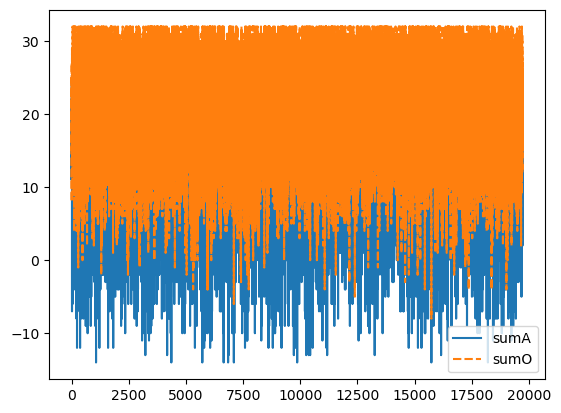

In [ ]:

sns.lineplot(data=sumframe)